In [1]:
import sys, os
import pandas as pd
import numpy as np
from statsmodels.tsa.base import tsa_model as tsa
from statsmodels.tsa import holtwinters as hw
#sys.path.append('../../../')

#from nyoka.PMML43Ext import *
#from nyoka.statsmodels import exponential_smoothing as es
from nyoka import ExponentialSmoothingToPMML 
import matplotlib.pyplot as plt

In [2]:
def import_data(trend=False, seasonality=False):
    """
    Returns a dataframe with time series values.
    :param trend: boolean
        If True, returns data with trend
    :param seasonality: boolean
        If True, returns data with seasonality
    :return: ts_data: DataFrame
        Index of the data frame is either a time-index or an integer index. First column has time series values
    """
    if trend and seasonality:
        # no of international visitors in Australia
        data = [41.7275, 24.0418, 32.3281, 37.3287, 46.2132, 29.3463, 36.4829, 42.9777, 48.9015, 31.1802, 37.7179,
                40.4202, 51.2069, 31.8872, 40.9783, 43.7725, 55.5586, 33.8509, 42.0764, 45.6423, 59.7668, 35.1919,
                44.3197, 47.9137]
        index = pd.DatetimeIndex(start='2005', end='2010-Q4', freq='QS')
        ts_data = pd.Series(data, index)
        ts_data.index.name = 'datetime_index'
        ts_data.name = 'n_visitors'
        return ts_data
    elif trend:
        # no. of annual passengers of air carriers registered in Australia
        data = [17.5534, 21.86, 23.8866, 26.9293, 26.8885, 28.8314, 30.0751, 30.9535, 30.1857, 31.5797, 32.5776,
                33.4774, 39.0216, 41.3864, 41.5966]
        index = pd.DatetimeIndex(start='1990', end='2005', freq='A')
        ts_data = pd.Series(data, index)
        ts_data.index.name = 'datetime_index'
        ts_data.name = 'n_passengers'
        return ts_data
    elif seasonality:
        pass
    else:
        # Oil production in Saudi Arabia
        data = [446.6565, 454.4733, 455.663, 423.6322, 456.2713, 440.5881, 425.3325, 485.1494, 506.0482, 526.792,
                514.2689, 494.211]
        index = pd.DatetimeIndex(start='1996', end='2008', freq='A')
        ts_data = pd.Series(data, index)
        ts_data.index.name = 'datetime_index'
        ts_data.name = 'oil_production'
        return ts_data

# Simple Exponential Smoothing
# No Trend No Seasonality

In [3]:
ts_data = import_data(trend=False, seasonality=False)

C:\Users\nibo\AppData\Local\Continuum\anaconda3\envs\ZXPO\lib\site-packages\ipykernel_launcher.py:36: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.


Yearly oil prodcution in Saudi Arabia

C:\Users\nibo\AppData\Local\Continuum\anaconda3\envs\ZXPO\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


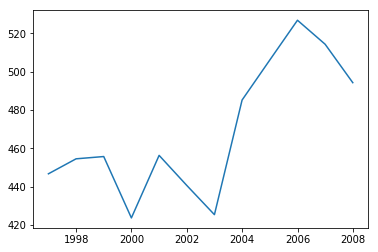

In [4]:
plt.plot(ts_data)

Create a model object using statsmodels, for simple exponential smoothing.

In [5]:
# trend: {add, mul, None}
# seasonal: {add, mul, None}
# damped: {True, False}
# seasonal_periods: {int, None}
model_obj = hw.ExponentialSmoothing(ts_data, 
                                    trend=None, 
                                    damped=False, 
                                    seasonal=None, 
                                    seasonal_periods=None)
results_obj = model_obj.fit(optimized=True)

Create a pmml file from the model object using Nyoka and the exporter

In [6]:
pmml_file_name = 'exponential_smoothing.pmml'
ExponentialSmoothingToPMML(ts_data, model_obj, results_obj, pmml_file_name);

# Holt's Exponential Smoothing (only trend, no seasonality)

In [7]:
ts_data = import_data(trend=True, seasonality=False)

C:\Users\nibo\AppData\Local\Continuum\anaconda3\envs\ZXPO\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.


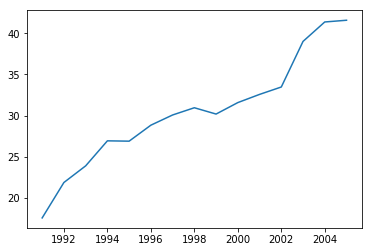

In [8]:
plt.plot(ts_data)

** Additive trend. No damping **

In [9]:
model_obj = hw.ExponentialSmoothing(ts_data, 
                                    trend='add', 
                                    damped=False, 
                                    seasonal=None, 
                                    seasonal_periods=None)
results_obj = model_obj.fit(optimized=True)

initial_level, inital_slope, smoothing_level and smoothing_slope are the relavant parameters

In [10]:
pmml_file_name = 'exponential_smoothing.pmml'
ExponentialSmoothingToPMML(ts_data, model_obj, results_obj, pmml_file_name);

** Addditve trend with damping**

In [15]:
model_obj = hw.ExponentialSmoothing(ts_data, 
                                    trend='add', 
                                    damped=True, 
                                    seasonal=None, 
                                    seasonal_periods=None)
results_obj = model_obj.fit(optimized=True)

In [16]:
pmml_file_name = 'exponential_smoothing.pmml'
ExponentialSmoothingToPMML(ts_data, model_obj, results_obj, pmml_file_name);

** Multiplicative trend. No damping**

In [13]:
model_obj = hw.ExponentialSmoothing(ts_data, 
                                    trend='mul', 
                                    damped=False, 
                                    seasonal=None, 
                                    seasonal_periods=None)
results_obj = model_obj.fit(optimized=True)

In [14]:
pmml_file_name = 'exponential_smoothing.pmml'
ExponentialSmoothingToPMML(ts_data, model_obj, results_obj, pmml_file_name);

** Multiplicative trend with damping**

In [21]:
model_obj = hw.ExponentialSmoothing(ts_data, 
                                    trend='mul', 
                                    damped=True, 
                                    seasonal=None, 
                                    seasonal_periods=None)
results_obj = model_obj.fit(optimized=True)

In [22]:
pmml_file_name = 'exponential_smoothing.pmml'
ExponentialSmoothingToPMML(ts_data, model_obj, results_obj, pmml_file_name);

# Holt - Winter Exponential Smoothing (trend and seasonality present)

** Additive trend, additive seasonality, no damping **

In [23]:
ts_data = import_data(trend=True, seasonality=True)

In [24]:
plt.plot(ts_data)

In [25]:
model_obj = hw.ExponentialSmoothing(ts_data, 
                                    trend='add', 
                                    damped=False, 
                                    seasonal='add', 
                                    seasonal_periods=4)
results_obj = model_obj.fit(optimized=True)

In [27]:
pmml_file_name = 'exponential_smoothing.pmml'
ExponentialSmoothingToPMML(ts_data, model_obj, results_obj, pmml_file_name);

** Additive trend, additive seasonality, with damping **

In [28]:
model_obj = hw.ExponentialSmoothing(ts_data, 
                                    trend='add', 
                                    damped=True, 
                                    seasonal='add', 
                                    seasonal_periods=4)
results_obj = model_obj.fit(optimized=True)

In [29]:
pmml_file_name = 'exponential_smoothing.pmml'
ExponentialSmoothingToPMML(ts_data, model_obj, results_obj, pmml_file_name);

** Additive trend, multiplicative seasonality, no damping **

In [30]:
model_obj = hw.ExponentialSmoothing(ts_data, 
                                    trend='add', 
                                    damped=False, 
                                    seasonal='mul', 
                                    seasonal_periods=4)
results_obj = model_obj.fit(optimized=True)

In [31]:
pmml_file_name = 'exponential_smoothing.pmml'
ExponentialSmoothingToPMML(ts_data, model_obj, results_obj, pmml_file_name);

** Additive trend, multiplicative seasonality with damping **

In [33]:
model_obj = hw.ExponentialSmoothing(ts_data, 
                                    trend='add', 
                                    damped=False, 
                                    seasonal='mul', 
                                    seasonal_periods=4)
results_obj = model_obj.fit(optimized=True)

In [32]:
pmml_file_name = 'exponential_smoothing.pmml'
ExponentialSmoothingToPMML(ts_data, model_obj, results_obj, pmml_file_name);